# Cross Species Analysis

## Read the results file

In [2]:
import os
import pandas as pd

species = ['mouse', 'zebrafish', 'wheat', 'fruitfly', 'roundworm', 'yeast', 'seavase']

resultsDict = dict()

for s in species:
    print('processing : ', s)
    resultsPath = '/home/yram0006/phd/chapter_1/workspace/linc2functionpipeline/identification/data/' + s
    li = []
    for fileName in os.listdir(resultsPath):
        if fileName.endswith('.csv'):
            print('fileName: ', fileName)
            df = pd.read_csv(resultsPath + '/' + fileName, index_col=None, header=0)
            li.append(df)
    resultsDf = pd.concat(li, axis=0, ignore_index=True)
    # targetDf = pd.read_csv('/home/yram0006/phd/chapter_1/workspace/linc2functionpipeline/identification/data/' + s + '/' + s + '_benchmark.csv')
    # targetDf.columns=['ID', 'TARGET']
    resultsDf.to_csv('/home/yram0006/phd/chapter_1/workspace/linc2functionpipeline/identification/data/' + s + '_benchmark.csv')

    # finalDf = resultsDf.merge(targetDf, on='ID', how='left')
    resultsDict[s] = resultsDf

processing :  mouse
fileName:  mouse_results_9.csv
fileName:  mouse_results_2.csv
fileName:  mouse_results_1.csv
fileName:  mouse_results_0.csv
fileName:  mouse_results_8.csv
fileName:  mouse_results_6.csv
fileName:  mouse_results_5.csv
fileName:  mouse_benchmark.csv
fileName:  mouse_results_4.csv
fileName:  mouse_results_14.csv
fileName:  mouse_results_7.csv
fileName:  mouse_results_17.csv
fileName:  mouse_results_3.csv
fileName:  mouse_results_18.csv
fileName:  mouse_results_15.csv
fileName:  mouse_results_16.csv
fileName:  mouse_results_12.csv
fileName:  mouse_results_11.csv
fileName:  mouse_results_13.csv
fileName:  mouse_results_19.csv
fileName:  mouse_results_10.csv
processing :  zebrafish
fileName:  zebrafish_results_5.csv
fileName:  zebrafish_results_9.csv
fileName:  zebrafish_results_1.csv
fileName:  zebrafish_results_6.csv
fileName:  zebrafish_results_12.csv
fileName:  zebrafish_results_11.csv
fileName:  zebrafish_benchmark.csv
fileName:  zebrafish_results_14.csv
fileName:  z

## Define Functions

In [3]:
def drawProbabilityDistributionPlot(species, lncrnanet2, lncrnanet):

    import seaborn as sns
    import matplotlib.pyplot as plt

    fig = plt.figure()
    sns.distplot(resultsDict[species].HS_BASIC_PRED, hist=True, rug=False, color='tab:orange', axlabel='Prediction Probability')
    sns.distplot(resultsDict[species].SA_BASIC_PRED, hist=True, rug=False, color='tab:blue', axlabel='Prediction Probability')
    sns.distplot(resultsDict[species].HS_STANDARD_PRED, hist=True, rug=False, color='tab:green', axlabel='Prediction Probability')
    sns.distplot(resultsDict[species].SA_STANDARD_PRED, hist=True, rug=False, color='tab:purple', axlabel='Prediction Probability')
    sns.distplot(lncrnanet2['preds'], hist=True, rug=False, color='tab:red', axlabel='Prediction Probability')
    sns.distplot(lncrnanet['preds'], hist=True, rug=False, color='tab:olive', axlabel='Prediction Probability')
    fig.legend(labels=['Human Specific Basic','Species Agnostic Basic', 'Human Specific Standard','Species Agnostic Standard', 'LncRNAnet2', 'LncRNAnet'])
    plt.show()

In [4]:
def drawAUROCPlot(species, lncrnanet2, lncrnanet):

    from sklearn.metrics import roc_curve
    from matplotlib import pyplot

    fpr_hsb, tpr_hsb, _ = roc_curve(resultsDict[species].LABEL, resultsDict[species]['HS_BASIC_PRED'])
    fpr_sab, tpr_sab, _ = roc_curve(resultsDict[species].LABEL, resultsDict[species]['SA_BASIC_PRED'])
    fpr_hss, tpr_hss, _ = roc_curve(resultsDict[species].LABEL, resultsDict[species]['HS_STANDARD_PRED'])
    fpr_sas, tpr_sas, _ = roc_curve(resultsDict[species].LABEL, resultsDict[species]['SA_STANDARD_PRED'])
    fpr_lrn2, tpr_lrn2, _ = roc_curve(lncrnanet2['labels'], lncrnanet2['preds'])
    fpr_lrn, tpr_lrn, _ = roc_curve(lncrnanet['labels'], lncrnanet['preds'])
    pyplot.plot(fpr_hsb, tpr_hsb, color='tab:orange', label='Human Specific Basic')
    pyplot.plot(fpr_sab, tpr_sab, color='tab:blue', label='Species Agnostic Basic')
    pyplot.plot(fpr_hss, tpr_hss, color='tab:green', label='Human Specific Standard')
    pyplot.plot(fpr_sas, tpr_sas, color='tab:purple', label='Species Agnostic Standard')
    pyplot.plot(fpr_lrn2, tpr_lrn2, color='tab:red', label='LncRNAnet2')
    pyplot.plot(fpr_lrn, tpr_lrn, color='tab:olive', label='LncRNAnet')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    # plt.figure(figsize=(15,10))
    pyplot.show()

In [5]:
all_species_performance_metrics = {}

def printPerformanceMetrics(species, lncrnanet2, lncrnanet):

    performance_metrics = {}

    from sklearn.metrics import auc, accuracy_score, accuracy_score, balanced_accuracy_score, roc_curve

    fpr_hsb, tpr_hsb, _ = roc_curve(resultsDict[species].LABEL, resultsDict[species]['HS_BASIC_PRED'])
    fpr_sab, tpr_sab, _ = roc_curve(resultsDict[species].LABEL, resultsDict[species]['SA_BASIC_PRED'])
    fpr_hss, tpr_hss, _ = roc_curve(resultsDict[species].LABEL, resultsDict[species]['HS_BASIC_PRED'])
    fpr_sas, tpr_sas, _ = roc_curve(resultsDict[species].LABEL, resultsDict[species]['SA_BASIC_PRED'])
    fpr_lrn2, tpr_lrn2, _ = roc_curve(lncrnanet2['labels'], lncrnanet2['preds'])
    fpr_lrn, tpr_lrn, _ = roc_curve(lncrnanet['labels'], lncrnanet['preds'])
    auc_hsb = auc(fpr_hsb, tpr_hsb)
    auc_sab = auc(fpr_sab, tpr_sab)
    auc_hss = auc(fpr_hss, tpr_hss)
    auc_sas = auc(fpr_sas, tpr_sas)
    auc_lrn2 = auc(fpr_lrn2, tpr_lrn2)
    auc_lrn = auc(fpr_lrn, tpr_lrn)
    accuracy_score_hsb = accuracy_score(resultsDict[species].LABEL, resultsDict[species]['HS_BASIC_PRED_CLASS'])
    accuracy_score_sab = accuracy_score(resultsDict[species].LABEL, resultsDict[species]['SA_BASIC_PRED_CLASS'])
    accuracy_score_hss = accuracy_score(resultsDict[species].LABEL, resultsDict[species]['HS_STANDARD_PRED_CLASS'])
    accuracy_score_sas = accuracy_score(resultsDict[species].LABEL, resultsDict[species]['SA_STANDARD_PRED_CLASS'])
    accuracy_score_lrn2 = accuracy_score(lncrnanet2['labels'], [0 if pred<0.5 else 1 for pred in lncrnanet2['preds']])
    accuracy_score_lrn = accuracy_score(lncrnanet['labels'], [0 if pred<0.5 else 1 for pred in lncrnanet['preds']])
    balanced_accuracy_score_hsb = balanced_accuracy_score(resultsDict[species].LABEL, resultsDict[species]['HS_BASIC_PRED_CLASS'])
    balanced_accuracy_score_sab = balanced_accuracy_score(resultsDict[species].LABEL, resultsDict[species]['SA_BASIC_PRED_CLASS'])
    balanced_accuracy_score_hss = balanced_accuracy_score(resultsDict[species].LABEL, resultsDict[species]['HS_STANDARD_PRED_CLASS'])
    balanced_accuracy_score_sas = balanced_accuracy_score(resultsDict[species].LABEL, resultsDict[species]['SA_STANDARD_PRED_CLASS'])
    balanced_accuracy_score_lrn2 = balanced_accuracy_score(lncrnanet2['labels'], [0 if pred<0.5 else 1 for pred in lncrnanet2['preds']])
    balanced_accuracy_score_lrn = balanced_accuracy_score(lncrnanet['labels'], [0 if pred<0.5 else 1 for pred in lncrnanet['preds']])

    performance_metrics['AUC HSB'] = auc_hsb
    performance_metrics['AUC SAB'] = auc_sab
    performance_metrics['AUC HSS'] = auc_hss
    performance_metrics['AUC SAS'] = auc_sas
    performance_metrics['AUC LRN2'] = auc_lrn2
    performance_metrics['AUC LRN'] = auc_lrn
    performance_metrics['ACCURACY HSB'] = accuracy_score_hsb
    performance_metrics['ACCURACY SAB'] = accuracy_score_sab
    performance_metrics['ACCURACY HSS'] = accuracy_score_hss
    performance_metrics['ACCURACY SAS'] = accuracy_score_sas
    performance_metrics['ACCURACY LRN2'] = accuracy_score_lrn2
    performance_metrics['ACCURACY LRN'] = accuracy_score_lrn
    performance_metrics['BALANCED ACCURACY HSB'] = balanced_accuracy_score_hsb
    performance_metrics['BALANCED ACCURACY SAB'] = balanced_accuracy_score_sab
    performance_metrics['BALANCED ACCURACY HSS'] = balanced_accuracy_score_hss
    performance_metrics['BALANCED ACCURACY SAS'] = balanced_accuracy_score_sas
    performance_metrics['BALANCED ACCURACY LRN2'] = balanced_accuracy_score_lrn2
    performance_metrics['BALANCED ACCURACY LRN'] = balanced_accuracy_score_lrn

    return performance_metrics

## Mouse

In [6]:
from Bio import SeqIO

cdsRecordIds = []
for record in SeqIO.parse("data/cross-species/mouse/gencode.vM25.lncRNA_transcripts.fa", "fasta"):
    cdsRecordIds.append(record.id)

def isRecordLncrna(id):
    for recordId in cdsRecordIds:
        if(recordId.startswith(id)):
            return 1
    return 0

resultsDict['mouse']['LABEL'] = [isRecordLncrna(id) for id in resultsDict['mouse'].ID]

In [7]:
import pickle

with open('/home/yram0006/phd/chapter_1/workspace/linc2functionpipeline/identification/data/mouse/predict_results.p', 'rb') as f:
    predict = pickle.load(f)

labels = [label[0] for labels in predict['labels'] for label in labels]
preds = [pred[0] for preds in predict['pred'] for pred in preds]

In [8]:
import pandas as pd

resultsPath = '/home/yram0006/phd/chapter_1/workspace/linc2functionpipeline/identification/data/mouse/mouse_results.txt'
lncRNAnetResultsDf = pd.read_csv(resultsPath, header=None, sep='\t')

def isRecordLncrna(id):
    for recordId in cdsRecordIds:
        if(recordId.startswith(id)):
            return 1
    return 0

lncRNAnetResultsDf['LABEL'] = [isRecordLncrna(id) for id in lncRNAnetResultsDf[0]]
lncRNAnetResultsDf['PREDS'] = [(pred + 1)/2 for pred in lncRNAnetResultsDf[2]]
lncRNAnetResultsDf

0     1         2   
0     ENSMUST00000190269.1|ENSMUSG00000101012.6|OTTM...   682  0.929370  \
1     ENSMUST00000139752.1|ENSMUSG00000085262.1|OTTM...   946  0.917833   
2     ENSMUST00000208843.1|ENSMUSG00000109084.1|OTTM...   229  0.995495   
3     ENSMUST00000181846.2|ENSMUSG00000097247.2|OTTM...  2345  0.978621   
4     ENSMUST00000194524.1|ENSMUSG00000103849.1|OTTM...  6387  0.975132   
...                                                 ...   ...       ...   
1995  ENSMUST00000084502.6|ENSMUSG00000066979.6|OTTM...  2218 -0.992313   
1996  ENSMUST00000039484.5|ENSMUSG00000039981.6|OTTM...  4092 -0.999489   
1997  ENSMUST00000168353.3|ENSMUSG00000015467.14|OTT...   985 -0.896965   
1998  ENSMUST00000053293.13|ENSMUSG00000036721.14|OT...  2270 -0.997679   
1999  ENSMUST00000155485.3|ENSMUSG00000068876.16|OTT...  2361 -0.998998   

      LABEL     PREDS  
0         1  0.964685  
1         1  0.958916  
2         1  0.997747  
3         1  0.989311  
4         1  0.987566  
...     ...       ...  
1995      0  0.003844  
1996      0  0.000255  
1997      0  0.051517  
1998      0  0.001160  
1999      0  0.000501  

[2000 rows x 5 columns]

/tmp/ipykernel_534002/3137063498.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resultsDict[species].HS_BASIC_PRED, hist=True, rug=False, color='tab:orange', axlabel='Prediction Probability')
/tmp/ipykernel_534002/3137063498.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resultsDict[sp

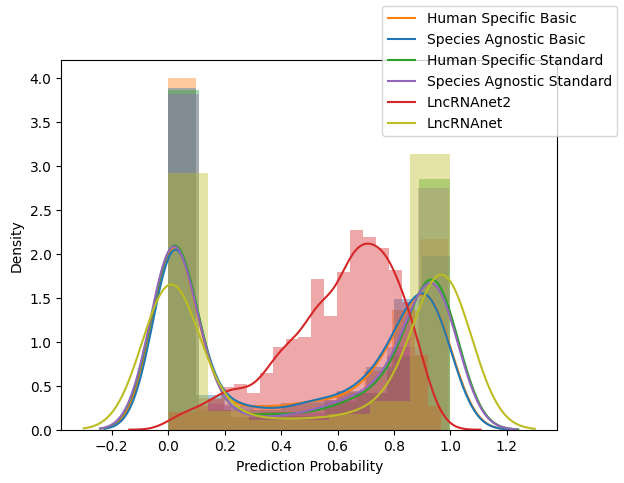

In [9]:
drawProbabilityDistributionPlot('mouse', lncrnanet2={'labels': labels, 'preds': preds}, lncrnanet={'labels': lncRNAnetResultsDf['LABEL'], 'preds': lncRNAnetResultsDf['PREDS']})

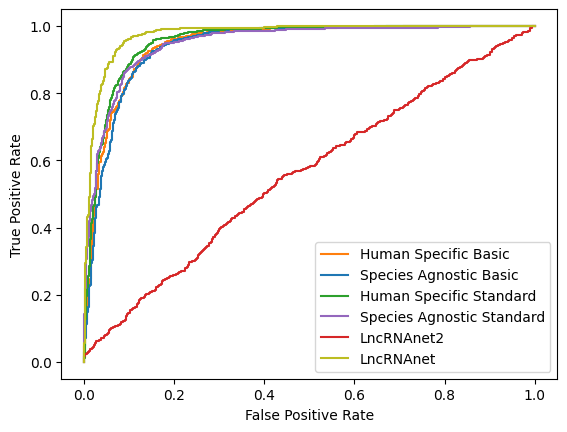

In [10]:
drawAUROCPlot('mouse', lncrnanet2={'labels': labels, 'preds': preds}, lncrnanet={'labels': lncRNAnetResultsDf['LABEL'], 'preds': lncRNAnetResultsDf['PREDS']})

In [11]:
performance_metrics = printPerformanceMetrics('mouse', lncrnanet2={'labels': labels, 'preds': preds}, lncrnanet={'labels': lncRNAnetResultsDf['LABEL'], 'preds': lncRNAnetResultsDf['PREDS']})
[print(key,':',value) for key, value in performance_metrics.items()]
all_species_performance_metrics['mouse'] = performance_metrics

AUC HSB : 0.945661
AUC SAB : 0.941433
AUC HSS : 0.945661
AUC SAS : 0.941433
AUC LRN2 : 0.5582424575955924
AUC LRN : 0.975168
ACCURACY HSB : 0.8755
ACCURACY SAB : 0.878
ACCURACY HSS : 0.894
ACCURACY SAS : 0.887
ACCURACY LRN2 : 0.5009242144177449
ACCURACY LRN : 0.932
BALANCED ACCURACY HSB : 0.8755
BALANCED ACCURACY SAB : 0.878
BALANCED ACCURACY HSS : 0.894
BALANCED ACCURACY SAS : 0.887
BALANCED ACCURACY LRN2 : 0.5261474631142375
BALANCED ACCURACY LRN : 0.9319999999999999


## Zebra Fish

In [12]:
from Bio import SeqIO

cdsRecordIds = []
for record in SeqIO.parse("data/cross-species/Danio_rerio.GRCz11.ncrna.fa", "fasta"):
    cdsRecordIds.append(record.id)

def isRecordLncrna(id):
    for recordId in cdsRecordIds:
        if(recordId.startswith(id)):
            return 1
    return 0

resultsDict['zebrafish']['LABEL'] = [isRecordLncrna(id) for id in resultsDict['zebrafish'].ID]

In [13]:
import pickle

with open('/home/yram0006/phd/chapter_1/workspace/linc2functionpipeline/identification/data/zebrafish/predict_results.p', 'rb') as f:
    predict = pickle.load(f)

labels = [label[0] for labels in predict['labels'] for label in labels]
preds = [pred[0] for preds in predict['pred'] for pred in preds]

In [14]:
import pandas as pd

resultsPath = '/home/yram0006/phd/chapter_1/workspace/linc2functionpipeline/identification/data/zebrafish/zebrafish_results.txt'
lncRNAnetResultsDf = pd.read_csv(resultsPath, header=None, sep='\t')

def isRecordLncrna(id):
    for recordId in cdsRecordIds:
        if(recordId.startswith(id)):
            return 1
    return 0

lncRNAnetResultsDf['LABEL'] = [isRecordLncrna(id) for id in lncRNAnetResultsDf[0]]
lncRNAnetResultsDf['PREDS'] = [(pred + 1)/2 for pred in lncRNAnetResultsDf[2]]
lncRNAnetResultsDf

0     1         2  LABEL     PREDS
0     ENSDART00000150574.2   465 -0.979947      0  0.010027
1     ENSDART00000135015.2   561 -0.937100      0  0.031450
2     ENSDART00000183376.1   390 -0.697445      0  0.151278
3     ENSDART00000183674.1  2454 -0.999995      0  0.000003
4     ENSDART00000058908.4   768 -0.989285      0  0.005358
...                    ...   ...       ...    ...       ...
1995  ENSDART00000177836.2   116  0.999572      1  0.999786
1996  ENSDART00000117264.2   118  0.967735      1  0.983867
1997  ENSDART00000162939.2  1169  0.521759      1  0.760879
1998  ENSDART00000194512.1   792 -0.995578      1  0.002211
1999  ENSDART00000124127.3  1311 -0.985006      1  0.007497

[2000 rows x 5 columns]

/tmp/ipykernel_534002/3137063498.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resultsDict[species].HS_BASIC_PRED, hist=True, rug=False, color='tab:orange', axlabel='Prediction Probability')
/tmp/ipykernel_534002/3137063498.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resultsDict[sp

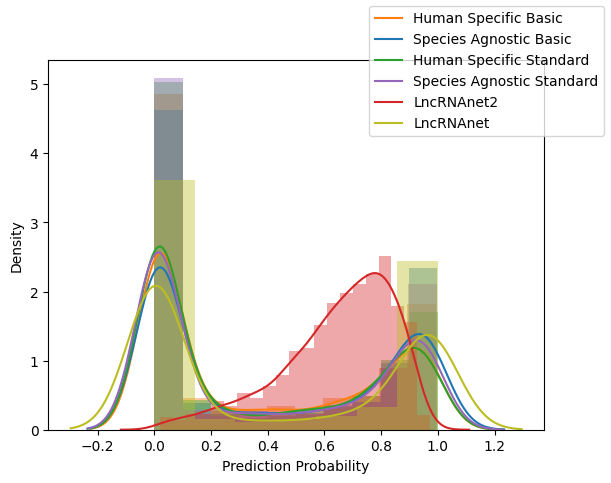

In [15]:
drawProbabilityDistributionPlot('zebrafish', lncrnanet2={'labels': labels, 'preds': preds}, lncrnanet={'labels': lncRNAnetResultsDf['LABEL'], 'preds': lncRNAnetResultsDf['PREDS']})

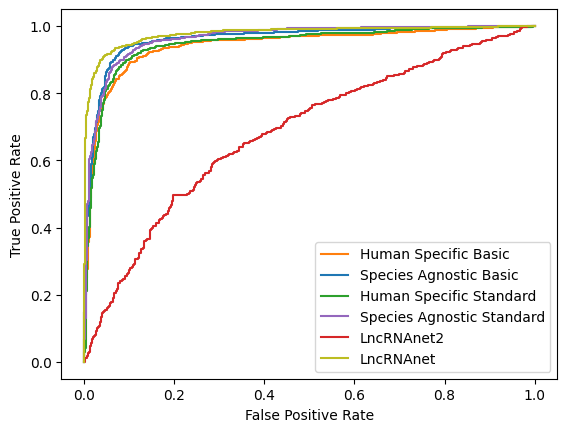

In [16]:
drawAUROCPlot('zebrafish', lncrnanet2={'labels': labels, 'preds': preds}, lncrnanet={'labels': lncRNAnetResultsDf['LABEL'], 'preds': lncRNAnetResultsDf['PREDS']})

In [17]:
performance_metrics = printPerformanceMetrics('zebrafish', lncrnanet2={'labels': labels, 'preds': preds}, lncrnanet={'labels': lncRNAnetResultsDf['LABEL'], 'preds': lncRNAnetResultsDf['PREDS']})
[print(key,':',value) for key, value in performance_metrics.items()]
all_species_performance_metrics['zebrafish'] = performance_metrics

AUC HSB : 0.942409
AUC SAB : 0.96126
AUC HSS : 0.942409
AUC SAS : 0.96126
AUC LRN2 : 0.6835117100919138
AUC LRN : 0.9770519999999999
ACCURACY HSB : 0.852
ACCURACY SAB : 0.885
ACCURACY HSS : 0.8425
ACCURACY SAS : 0.8585
ACCURACY LRN2 : 0.6306429548563611
ACCURACY LRN : 0.912
BALANCED ACCURACY HSB : 0.852
BALANCED ACCURACY SAB : 0.885
BALANCED ACCURACY HSS : 0.8425
BALANCED ACCURACY SAS : 0.8585
BALANCED ACCURACY LRN2 : 0.579936295860006
BALANCED ACCURACY LRN : 0.9119999999999999


## Wheat

In [18]:
from Bio import SeqIO

cdsRecordIds = []
for record in SeqIO.parse("data/cross-species/Triticum_aestivum.IWGSC.ncrna.fa", "fasta"):
    cdsRecordIds.append(record.id)

def isRecordLncrna(id):
    for recordId in cdsRecordIds:
        if(recordId.startswith(id)):
            return 1
    return 0

resultsDict['wheat']['LABEL'] = [isRecordLncrna(id) for id in resultsDict['wheat'].ID]

In [19]:
import pickle

with open('/home/yram0006/phd/chapter_1/workspace/linc2functionpipeline/identification/data/wheat/predict_results.p', 'rb') as f:
    predict = pickle.load(f)

labels = [label[0] for labels in predict['labels'] for label in labels]
preds = [pred[0] for preds in predict['pred'] for pred in preds]

In [20]:
import pandas as pd

resultsPath = '/home/yram0006/phd/chapter_1/workspace/linc2functionpipeline/identification/data/wheat/wheat_results.txt'
lncRNAnetResultsDf = pd.read_csv(resultsPath, header=None, sep='\t')

def isRecordLncrna(id):
    for recordId in cdsRecordIds:
        if(recordId.startswith(id)):
            return 1
    return 0

lncRNAnetResultsDf['LABEL'] = [isRecordLncrna(id) for id in lncRNAnetResultsDf[0]]
lncRNAnetResultsDf['PREDS'] = [(pred + 1)/2 for pred in lncRNAnetResultsDf[2]]
lncRNAnetResultsDf

0     1         2  LABEL     PREDS
0     TraesCS2A02G574600.1  1500 -0.999879      0  0.000061
1     TraesCS5A02G018100.1   678 -0.998784      0  0.000608
2     TraesCS1D02G020100.1   699 -0.996065      0  0.001968
3     TraesCS5A02G276900.1  1611 -0.999950      0  0.000025
4     TraesCS1D02G341100.1  3015 -0.999996      0  0.000002
...                    ...   ...       ...    ...       ...
1995    ENSRNA050017229-T1   119  0.897683      1  0.948841
1996    ENSRNA050015276-T1   119  0.680908      1  0.840454
1997    ENSRNA050020439-T1   119  0.872666      1  0.936333
1998    ENSRNA050023897-T1    87  0.981470      1  0.990735
1999    ENSRNA050015986-T1   504 -0.040999      1  0.479500

[2000 rows x 5 columns]

/tmp/ipykernel_534002/3137063498.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resultsDict[species].HS_BASIC_PRED, hist=True, rug=False, color='tab:orange', axlabel='Prediction Probability')
/tmp/ipykernel_534002/3137063498.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resultsDict[sp

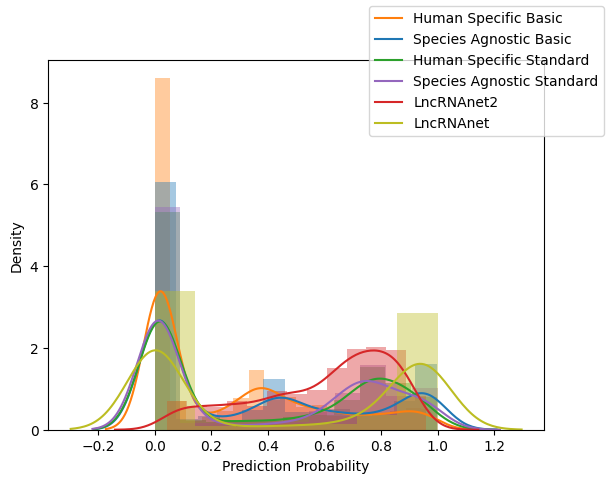

In [21]:
drawProbabilityDistributionPlot('wheat', lncrnanet2={'labels': labels, 'preds': preds}, lncrnanet={'labels': lncRNAnetResultsDf['LABEL'], 'preds': lncRNAnetResultsDf['PREDS']})

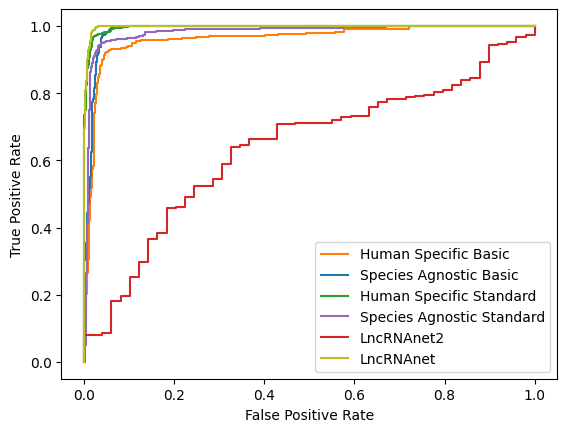

In [22]:
drawAUROCPlot('wheat', lncrnanet2={'labels': labels, 'preds': preds}, lncrnanet={'labels': lncRNAnetResultsDf['LABEL'], 'preds': lncRNAnetResultsDf['PREDS']})

In [23]:
performance_metrics = printPerformanceMetrics('wheat', lncrnanet2={'labels': labels, 'preds': preds}, lncrnanet={'labels': lncRNAnetResultsDf['LABEL'], 'preds': lncRNAnetResultsDf['PREDS']})
[print(key,':',value) for key, value in performance_metrics.items()]
all_species_performance_metrics['wheat'] = performance_metrics

AUC HSB : 0.962038
AUC SAB : 0.9866079999999999
AUC HSS : 0.962038
AUC SAS : 0.9866079999999999
AUC LRN2 : 0.6374665127523795
AUC LRN : 0.9971979999999999
ACCURACY HSB : 0.7085
ACCURACY SAB : 0.8045
ACCURACY HSS : 0.924
ACCURACY SAS : 0.929
ACCURACY LRN2 : 0.6866125760649088
ACCURACY LRN : 0.971
BALANCED ACCURACY HSB : 0.7085
BALANCED ACCURACY SAB : 0.8045
BALANCED ACCURACY HSS : 0.9239999999999999
BALANCED ACCURACY SAS : 0.929
BALANCED ACCURACY LRN2 : 0.6320323220003049
BALANCED ACCURACY LRN : 0.971


## Fruit Fly

In [24]:
from Bio import SeqIO

cdsRecordIds = []
for record in SeqIO.parse("data/cross-species/Drosophila_melanogaster.BDGP6.28.ncrna.fa", "fasta"):
    cdsRecordIds.append(record.id)

def isRecordLncrna(id):
    for recordId in cdsRecordIds:
        if(recordId.startswith(id)):
            return 1
    return 0

resultsDict['fruitfly']['LABEL'] = [isRecordLncrna(id) for id in resultsDict['fruitfly'].ID]

In [25]:
import pickle

with open('/home/yram0006/phd/chapter_1/workspace/linc2functionpipeline/identification/data/fruitfly/predict_results.p', 'rb') as f:
    predict = pickle.load(f)

labels = [label[0] for labels in predict['labels'] for label in labels]
preds = [pred[0] for preds in predict['pred'] for pred in preds]

In [26]:
import pandas as pd

resultsPath = '/home/yram0006/phd/chapter_1/workspace/linc2functionpipeline/identification/data/fruitfly/fruitfly_results.txt'
lncRNAnetResultsDf = pd.read_csv(resultsPath, header=None, sep='\t')

def isRecordLncrna(id):
    for recordId in cdsRecordIds:
        if(recordId.startswith(id)):
            return 1
    return 0

lncRNAnetResultsDf['LABEL'] = [isRecordLncrna(id) for id in lncRNAnetResultsDf[0]]
lncRNAnetResultsDf['PREDS'] = [(pred + 1)/2 for pred in lncRNAnetResultsDf[2]]
lncRNAnetResultsDf

0      1         2  LABEL         PREDS
0     FBtr0347556  11226 -1.000000      0  2.220446e-16
1     FBtr0299661   2100 -0.999969      0  1.566612e-05
2     FBtr0072100    564 -0.997941      0  1.029601e-03
3     FBtr0071639    714 -0.995746      0  2.126812e-03
4     FBtr0339509   1581 -0.999745      0  1.275444e-04
...           ...    ...       ...    ...           ...
1895  FBtr0333966   1712  0.607649      1  8.038243e-01
1896  FBtr0091729     36  0.282712      1  6.413561e-01
1897  FBtr0113574    145  0.998124      1  9.990621e-01
1898  FBtr0346789   1431  0.254197      1  6.270983e-01
1899  FBtr0309772    147  0.949529      1  9.747646e-01

[1900 rows x 5 columns]

/tmp/ipykernel_534002/3137063498.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resultsDict[species].HS_BASIC_PRED, hist=True, rug=False, color='tab:orange', axlabel='Prediction Probability')
/tmp/ipykernel_534002/3137063498.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resultsDict[sp

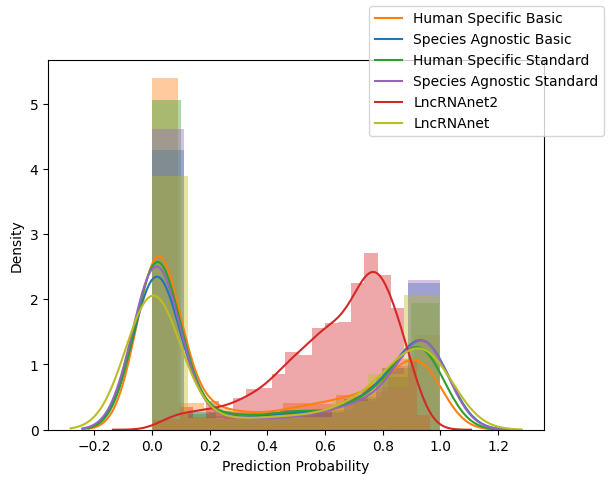

In [27]:
drawProbabilityDistributionPlot('fruitfly', lncrnanet2={'labels': labels, 'preds': preds}, lncrnanet={'labels': lncRNAnetResultsDf['LABEL'], 'preds': lncRNAnetResultsDf['PREDS']})

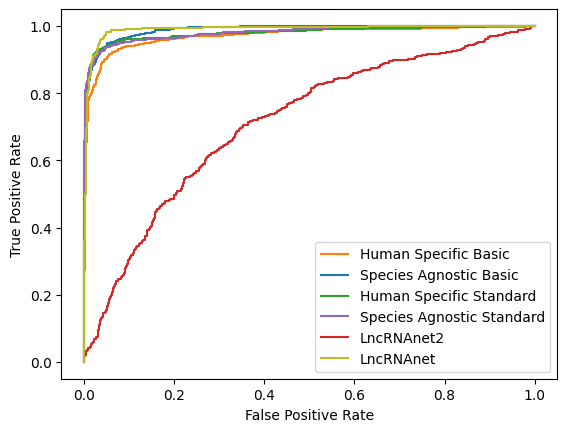

In [28]:
drawAUROCPlot('fruitfly', lncrnanet2={'labels': labels, 'preds': preds}, lncrnanet={'labels': lncRNAnetResultsDf['LABEL'], 'preds': lncRNAnetResultsDf['PREDS']})

In [29]:
performance_metrics = printPerformanceMetrics('fruitfly', lncrnanet2={'labels': labels, 'preds': preds}, lncrnanet={'labels': lncRNAnetResultsDf['LABEL'], 'preds': lncRNAnetResultsDf['PREDS']})
[print(key,':',value) for key, value in performance_metrics.items()]
all_species_performance_metrics['fruitfly'] = performance_metrics

AUC HSB : 0.9705588888888887
AUC SAB : 0.9879188888888889
AUC HSS : 0.9705588888888887
AUC SAS : 0.9879188888888889
AUC LRN2 : 0.7130370443260264
AUC LRN : 0.9895555555555555
ACCURACY HSB : 0.8457894736842105
ACCURACY SAB : 0.9005263157894737
ACCURACY HSS : 0.8663157894736843
ACCURACY SAS : 0.8873684210526316
ACCURACY LRN2 : 0.6141678129298487
ACCURACY LRN : 0.9057894736842105
BALANCED ACCURACY HSB : 0.8531666666666666
BALANCED ACCURACY SAB : 0.9050555555555555
BALANCED ACCURACY HSS : 0.8728333333333333
BALANCED ACCURACY SAS : 0.8928333333333334
BALANCED ACCURACY LRN2 : 0.6108812976868112
BALANCED ACCURACY LRN : 0.9098888888888889


## Roundworm

In [30]:
from Bio import SeqIO

cdsRecordIds = []
for record in SeqIO.parse("data/cross-species/Caenorhabditis_elegans.WBcel235.ncrna.fa", "fasta"):
    cdsRecordIds.append(record.id)

def isRecordLncrna(id):
    for recordId in cdsRecordIds:
        if(recordId.startswith(id)):
            return 1
    return 0

resultsDict['roundworm']['LABEL'] = [isRecordLncrna(id) for id in resultsDict['roundworm'].ID]

In [31]:
import pickle

with open('/home/yram0006/phd/chapter_1/workspace/linc2functionpipeline/identification/data/roundworm/predict_results.p', 'rb') as f:
    predict = pickle.load(f)

labels = [label[0] for labels in predict['labels'] for label in labels]
preds = [pred[0] for preds in predict['pred'] for pred in preds]

In [32]:
import pandas as pd

resultsPath = '/home/yram0006/phd/chapter_1/workspace/linc2functionpipeline/identification/data/roundworm/roundworm_results.txt'
lncRNAnetResultsDf = pd.read_csv(resultsPath, header=None, sep='\t')

def isRecordLncrna(id):
    for recordId in cdsRecordIds:
        if(recordId.startswith(id)):
            return 1
    return 0

lncRNAnetResultsDf['LABEL'] = [isRecordLncrna(id) for id in lncRNAnetResultsDf[0]]
lncRNAnetResultsDf['PREDS'] = [(pred + 1)/2 for pred in lncRNAnetResultsDf[2]]
lncRNAnetResultsDf

0     1         2  LABEL         PREDS
0         CD4.2.1   861 -0.999837      0  8.148879e-05
1      T21D12.3.2   843 -0.999659      0  1.703592e-04
2      ZK757.10.1   465 -0.997934      0  1.032773e-03
3     F26H11.2n.1  6591 -1.000000      0  6.638079e-12
4      C08H9.13.1  1449 -0.999941      0  2.931417e-05
...           ...   ...       ...    ...           ...
2052       M79.12    85  0.960600      1  9.803002e-01
2053     K08B4.43   139  0.923692      1  9.618461e-01
2054     ZK1321.5   110  0.289136      1  6.445681e-01
2055  Y105C5B.153    21  0.910333      1  9.551665e-01
2056  Y64G10A.113    21  0.836634      1  9.183172e-01

[2057 rows x 5 columns]

/tmp/ipykernel_534002/3137063498.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resultsDict[species].HS_BASIC_PRED, hist=True, rug=False, color='tab:orange', axlabel='Prediction Probability')
/tmp/ipykernel_534002/3137063498.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resultsDict[sp

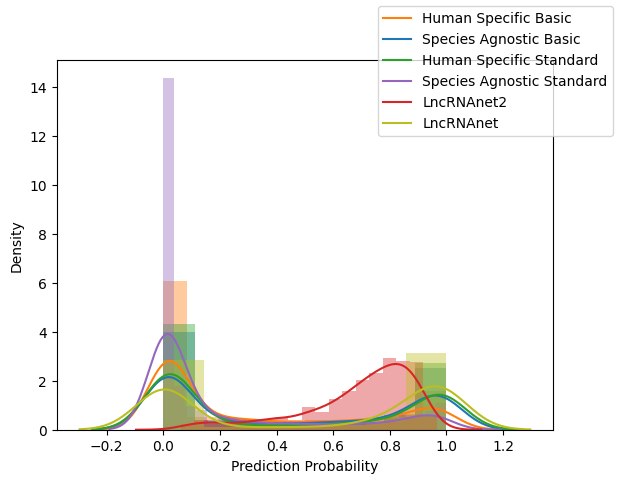

In [33]:
drawProbabilityDistributionPlot('roundworm', lncrnanet2={'labels': labels, 'preds': preds}, lncrnanet={'labels': lncRNAnetResultsDf['LABEL'], 'preds': lncRNAnetResultsDf['PREDS']})

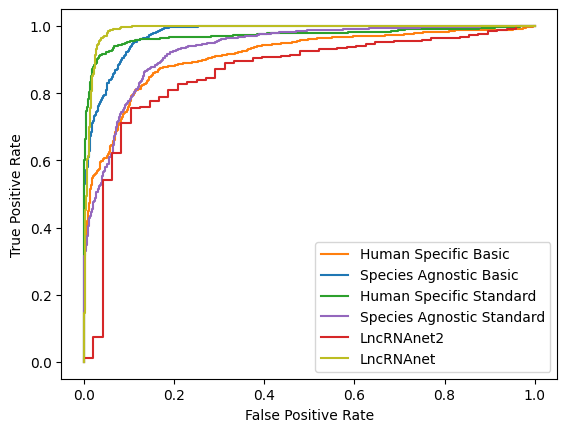

In [34]:
drawAUROCPlot('roundworm', lncrnanet2={'labels': labels, 'preds': preds}, lncrnanet={'labels': lncRNAnetResultsDf['LABEL'], 'preds': lncRNAnetResultsDf['PREDS']})

In [35]:
performance_metrics = printPerformanceMetrics('roundworm', lncrnanet2={'labels': labels, 'preds': preds}, lncrnanet={'labels': lncRNAnetResultsDf['LABEL'], 'preds': lncRNAnetResultsDf['PREDS']})
[print(key,':',value) for key, value in performance_metrics.items()]
all_species_performance_metrics['roundworm'] = performance_metrics

AUC HSB : 0.9105432098765432
AUC SAB : 0.9750493827160494
AUC HSS : 0.9105432098765432
AUC SAS : 0.9750493827160494
AUC LRN2 : 0.8596728081321473
AUC LRN : 0.9892941515413426
ACCURACY HSB : 0.7794444444444445
ACCURACY SAB : 0.8838888888888888
ACCURACY HSS : 0.9172222222222223
ACCURACY SAS : 0.6883333333333334
ACCURACY LRN2 : 0.8610778443113772
ACCURACY LRN : 0.9596499756927565
BALANCED ACCURACY HSB : 0.7794444444444444
BALANCED ACCURACY SAB : 0.883888888888889
BALANCED ACCURACY HSS : 0.9172222222222222
BALANCED ACCURACY SAS : 0.6883333333333334
BALANCED ACCURACY LRN2 : 0.7893636171113936
BALANCED ACCURACY LRN : 0.960059060789398


## Yeast

In [36]:
from Bio import SeqIO

cdsRecordIds = []
for record in SeqIO.parse("data/cross-species/Saccharomyces_cerevisiae.R64-1-1.ncrna.fa", "fasta"):
    cdsRecordIds.append(record.id)

def isRecordLncrna(id):
    for recordId in cdsRecordIds:
        if(recordId.startswith(id)):
            return 1
    return 0

resultsDict['yeast']['LABEL'] = [isRecordLncrna(id) for id in resultsDict['yeast'].ID]

In [37]:
import pickle

with open('/home/yram0006/phd/chapter_1/workspace/linc2functionpipeline/identification/data/yeast/predict_results.p', 'rb') as f:
    predict = pickle.load(f)

labels = [label[0] for labels in predict['labels'] for label in labels]
preds = [pred[0] for preds in predict['pred'] for pred in preds]

In [38]:
import pandas as pd

resultsPath = '/home/yram0006/phd/chapter_1/workspace/linc2functionpipeline/identification/data/yeast/yeast_results.txt'
lncRNAnetResultsDf = pd.read_csv(resultsPath, header=None, sep='\t')

def isRecordLncrna(id):
    for recordId in cdsRecordIds:
        if(recordId.startswith(id)):
            return 1
    return 0

lncRNAnetResultsDf['LABEL'] = [isRecordLncrna(id) for id in lncRNAnetResultsDf[0]]
lncRNAnetResultsDf['PREDS'] = [(pred + 1)/2 for pred in lncRNAnetResultsDf[2]]
lncRNAnetResultsDf

0     1         2  LABEL         PREDS
0     YMR293C_mRNA  1395 -0.999843      0  7.867723e-05
1     YPR054W_mRNA  1167 -0.999679      0  1.604567e-04
2     YIL026C_mRNA  3453 -1.000000      0  2.480515e-07
3     YCR051W_mRNA   669 -0.996993      0  1.503340e-03
4     YJL075C_mRNA   417 -0.972344      0  1.382816e-02
..             ...   ...       ...    ...           ...
835  tY(GUA)D_tRNA    75  0.859283      1  9.296416e-01
836  snR17a_snoRNA   333  0.716655      1  8.583273e-01
837  tL(UAA)K_tRNA    84  0.414111      1  7.070553e-01
838  tP(UGG)F_tRNA    72  0.832840      1  9.164201e-01
839   snR61_snoRNA    90  0.998591      1  9.992957e-01

[840 rows x 5 columns]

/tmp/ipykernel_534002/3137063498.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resultsDict[species].HS_BASIC_PRED, hist=True, rug=False, color='tab:orange', axlabel='Prediction Probability')
/tmp/ipykernel_534002/3137063498.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resultsDict[sp

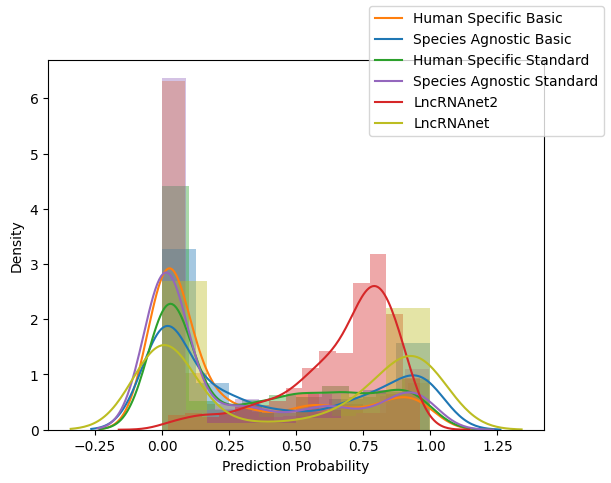

In [39]:
drawProbabilityDistributionPlot('yeast', lncrnanet2={'labels': labels, 'preds': preds}, lncrnanet={'labels': lncRNAnetResultsDf['LABEL'], 'preds': lncRNAnetResultsDf['PREDS']})

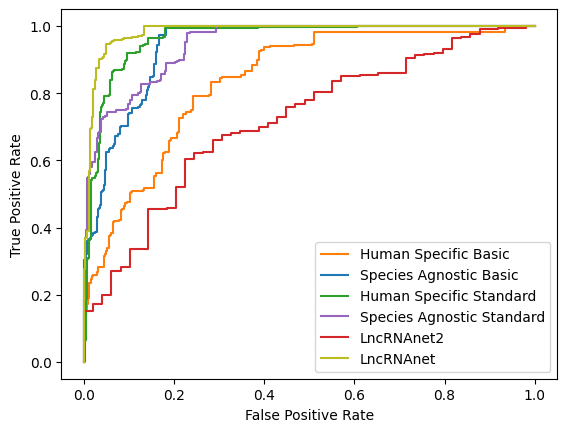

In [40]:
drawAUROCPlot('yeast', lncrnanet2={'labels': labels, 'preds': preds}, lncrnanet={'labels': lncRNAnetResultsDf['LABEL'], 'preds': lncRNAnetResultsDf['PREDS']})

In [41]:
performance_metrics = printPerformanceMetrics('yeast', lncrnanet2={'labels': labels, 'preds': preds}, lncrnanet={'labels': lncRNAnetResultsDf['LABEL'], 'preds': lncRNAnetResultsDf['PREDS']})
[print(key,':',value) for key, value in performance_metrics.items()]
all_species_performance_metrics['yeast'] = performance_metrics

AUC HSB : 0.838424036281179
AUC SAB : 0.9409920634920635
AUC HSS : 0.838424036281179
AUC SAS : 0.9409920634920635
AUC LRN2 : 0.7187012007969416
AUC LRN : 0.9827777777777778
ACCURACY HSB : 0.6833333333333333
ACCURACY SAB : 0.8095238095238095
ACCURACY HSS : 0.8202380952380952
ACCURACY SAS : 0.7702380952380953
ACCURACY LRN2 : 0.8037383177570093
ACCURACY LRN : 0.944047619047619
BALANCED ACCURACY HSB : 0.6833333333333333
BALANCED ACCURACY SAB : 0.8095238095238095
BALANCED ACCURACY HSS : 0.8202380952380952
BALANCED ACCURACY SAS : 0.7702380952380953
BALANCED ACCURACY LRN2 : 0.6404070863173765
BALANCED ACCURACY LRN : 0.944047619047619


## Sea vase

In [42]:
from Bio import SeqIO

cdsRecordIds = []
for record in SeqIO.parse("data/cross-species/Ciona_intestinalis.KH.ncrna.fa", "fasta"):
    cdsRecordIds.append(record.id)

def isRecordLncrna(id):
    for recordId in cdsRecordIds:
        if(recordId.startswith(id)):
            return 1
    return 0

resultsDict['seavase']['LABEL'] = [isRecordLncrna(id) for id in resultsDict['seavase'].ID]

In [43]:
import pickle

with open('/home/yram0006/phd/chapter_1/workspace/linc2functionpipeline/identification/data/seavase/predict_results.p', 'rb') as f:
    predict = pickle.load(f)

labels = [label[0] for labels in predict['labels'] for label in labels]
preds = [pred[0] for preds in predict['pred'] for pred in preds]

In [44]:
import pandas as pd

resultsPath = '/home/yram0006/phd/chapter_1/workspace/linc2functionpipeline/identification/data/seavase/seavase_results.txt'
lncRNAnetResultsDf = pd.read_csv(resultsPath, header=None, sep='\t')

def isRecordLncrna(id):
    for recordId in cdsRecordIds:
        if(recordId.startswith(id)):
            return 1
    return 0

lncRNAnetResultsDf['LABEL'] = [isRecordLncrna(id) for id in lncRNAnetResultsDf[0]]
lncRNAnetResultsDf['PREDS'] = [(pred + 1)/2 for pred in lncRNAnetResultsDf[2]]
lncRNAnetResultsDf

0     1         2  LABEL         PREDS
0    ENSCINT00000011521.3  4968 -1.000000      0  1.850820e-09
1    ENSCINT00000027737.2   654 -0.998210      0  8.952116e-04
2    ENSCINT00000036747.1  1176 -0.999176      0  4.118076e-04
3    ENSCINT00000036662.1   135 -0.924371      0  3.781456e-02
4    ENSCINT00000025702.2   222  0.850261      0  9.251306e-01
..                    ...   ...       ...    ...           ...
295  ENSCINT00000021593.1    70  0.840248      1  9.201238e-01
296  ENSCINT00000033910.1    59  0.834415      1  9.172076e-01
297  ENSCINT00000032072.1    57  0.690377      1  8.451887e-01
298  ENSCINT00000030176.1   134  0.598821      1  7.994105e-01
299  ENSCINT00000032428.1    86  0.524085      1  7.620426e-01

[300 rows x 5 columns]

/tmp/ipykernel_534002/3137063498.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resultsDict[species].HS_BASIC_PRED, hist=True, rug=False, color='tab:orange', axlabel='Prediction Probability')
/tmp/ipykernel_534002/3137063498.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resultsDict[sp

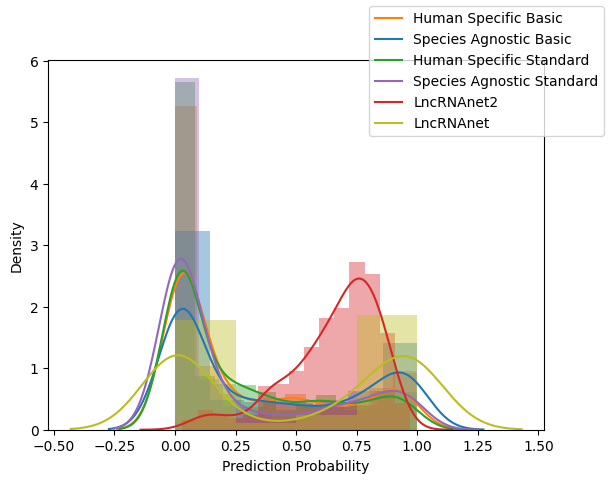

In [45]:
drawProbabilityDistributionPlot('seavase', lncrnanet2={'labels': labels, 'preds': preds}, lncrnanet={'labels': lncRNAnetResultsDf['LABEL'], 'preds': lncRNAnetResultsDf['PREDS']})

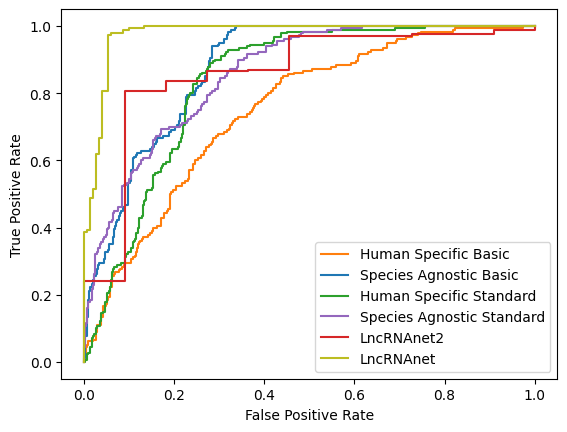

In [46]:
drawAUROCPlot('seavase', lncrnanet2={'labels': labels, 'preds': preds}, lncrnanet={'labels': lncRNAnetResultsDf['LABEL'], 'preds': lncRNAnetResultsDf['PREDS']})

In [47]:
performance_metrics = printPerformanceMetrics('seavase', lncrnanet2={'labels': labels, 'preds': preds}, lncrnanet={'labels': lncRNAnetResultsDf['LABEL'], 'preds': lncRNAnetResultsDf['PREDS']})
[print(key,':',value) for key, value in performance_metrics.items()]
all_species_performance_metrics['seavase'] = performance_metrics

AUC HSB : 0.749320987654321
AUC SAB : 0.8767654320987655
AUC HSS : 0.749320987654321
AUC SAS : 0.8767654320987655
AUC LRN2 : 0.8605135322692574
AUC LRN : 0.9767555555555556
ACCURACY HSB : 0.7206349206349206
ACCURACY SAB : 0.765079365079365
ACCURACY HSS : 0.753968253968254
ACCURACY SAS : 0.7936507936507936
ACCURACY LRN2 : 0.8217821782178217
ACCURACY LRN : 0.9533333333333334
BALANCED ACCURACY HSB : 0.6544444444444444
BALANCED ACCURACY SAB : 0.758888888888889
BALANCED ACCURACY HSS : 0.6827777777777778
BALANCED ACCURACY SAS : 0.7355555555555555
BALANCED ACCURACY LRN2 : 0.8200323849178811
BALANCED ACCURACY LRN : 0.9533333333333334


## All Species

In [48]:
auc_list = []
for key in all_species_performance_metrics.keys():
    auc_list.append(all_species_performance_metrics[key]['AUC HSB'])
    auc_list.append(all_species_performance_metrics[key]['AUC SAB'])
    auc_list.append(all_species_performance_metrics[key]['AUC HSS'])
    auc_list.append(all_species_performance_metrics[key]['AUC SAS'])
    auc_list.append(all_species_performance_metrics[key]['AUC LRN2'])
    auc_list.append(all_species_performance_metrics[key]['AUC LRN'])

In [49]:
species_list = ['mouse'] * 6 + ['zebrafish'] * 6 + ['wheat'] * 6 + ['fruitfly'] * 6 + ['roundworm'] * 6 + ['yeast'] * 6 + ['seavase'] * 6

In [50]:
models_list = ['HSB', 'SAB', 'HSS', 'SAS', 'LRN2', 'LRN'] * 7

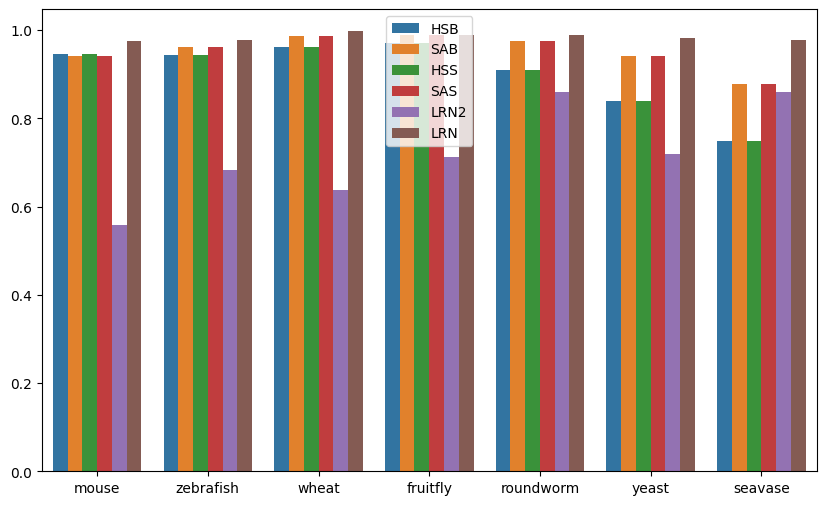

In [51]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
ax = sns.barplot(x=species_list, y=auc_list, hue=models_list)
ax.legend(loc=9)

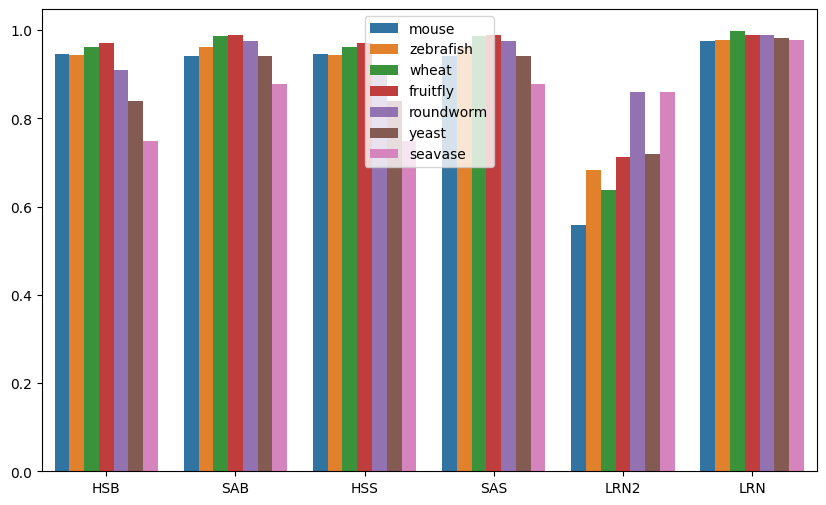

In [52]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
ax = sns.barplot(x=models_list, y=auc_list, hue=species_list)
ax.legend(loc=9)